In [ ]:
import psycopg2
import json

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

# Query the materialized view

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM verify_website_visits_dbt;""")
    # print(cur.fetchall())
    result = cur.fetchall()
    # Convert the list of tuples to a list of dictionaries
    formatted_result = [{'timestamp': str(item[3]), 'user_id': item[0], 'page_id': item[1], 'action': item[2], 'msg_key': str(item[8], 'utf-8'), 'offset': item[6]} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))

conn.close()

In [ ]:
import psycopg2
import json

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

# Query the table

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM kafka_website_visits_table;""")
    # print(cur.fetchall())
    result = cur.fetchall()
    print(result)
    # Convert the list of tuples to a list of dictionaries
    formatted_result = [{'timestamp': str(item[3]), 'user_id': item[0], 'page_id': item[1], 'action': item[2], 'msg_key': str(item[8], 'utf-8'), 'offset': item[6]} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))

conn.close()

In [82]:
import psycopg2
import json

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

# Query the table

with conn.cursor() as cur:
    cur.execute("""
SELECT msg_key FROM kafka_website_visits_table;""")
    # print(cur.fetchall())
    result = cur.fetchall()
    #msg_keys = [str(x[0], 'utf-8') for x in result]
    #print(msg_keys)
    print(list(map(lambda x: str(x[0], 'utf-8'), result)))

conn.close()

['3', '8', '9', '10', '9', '1', '3', '2', '8', '10', '4', '2', '10', '9', '8', '6', '5', '6', '4', '6', '2', '2', '7', '10', '4', '10', '8', '7', '2', '9', '7', '9', '9', '8', '1', '7', '10', '7', '2', '5', '9', '8', '5', '5', '1', '3', '10', '4', '4', '9', '9', '10', '3', '5', '3', '8', '8', '10', '7', '3', '9', '2', '2', '6', '7', '6', '6', '4', '5', '3', '8', '9', '6', '6', '2', '2', '3', '3', '3', '6', '9', '5', '6', '5', '4', '3', '5', '10', '8', '10', '1', '4', '10', '5', '7', '6', '3', '8', '4', '10', '6', '8', '3', '10', '9', '1', '10', '3', '8', '1', '1', '6', '4', '4', '6', '7', '6', '9', '3', '6', '2', '2', '7', '2', '4', '1', '9', '6', '1', '10', '10', '10', '5', '6', '9', '6', '8', '3', '4', '3', '5', '3', '10', '3', '6', '6', '4', '4', '1', '3', '1', '9', '10', '6', '6', '10', '10', '1', '5', '4', '4', '9', '4', '4', '7', '5', '9', '6', '6', '6', '5', '8', '10', '2', '10', '2', '1', '6', '8', '1', '9', '9', '10', '10', '2', '1', '6', '7', '2', '8', '10', '5', '6', '1', '6

In [ ]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM page_visits_stats;""")
    
    result = cur.fetchall()
    # Convert the list of tuples to a list of dictionaries
    formatted_result = [{'page_id': item[0], 'total_visits': item[1], 'unique_visitors': item[2], 'last_visit_time': str(item[3])} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))
    
conn.close()

In [ ]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM pg_users_table;""")
    
    print(cur.fetchall())
    
conn.close()

In [ ]:
conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM website_visits_from_users_dbt;""")
    
    result = cur.fetchall()
    # Convert the list of tuples to a list of dictionaries
    formatted_result = [{'timestamp': str(item[0]), 'user_id': item[1], 'user_name': item[2], 'user_age': item[3], 'page_id': item[4], 'action': item[5]} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))
    
conn.close()

In [ ]:
conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM most_visited_pages_dbt;""")
    
    result = cur.fetchall()
    # Convert the list of tuples to a list of dictionaries
    formatted_result = [{'page_id': item[0], 'total_visits': item[1]} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))
    
conn.close()

In [84]:
import psycopg2
import pprint

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM website_visits_2min_dbt;""")
    
    result = cur.fetchall()

    formatted_result = [{'user_id': item[0], 'first_name': item[1], 'last_name': item[2], 
                         'age': item[3], 'page_id': item[4], 'num_actions': item[5], 
                         'window_end': str(item[6])} for item in result]

    # Pretty-print the formatted result as JSON
    print(json.dumps(formatted_result, indent=4))
    # pprint.pprint(result)
    
    #columns = [desc[0] for desc in cur.description]
    #for row in result:
        #print (dict(zip(columns, row)))
    
conn.close()

[
    {
        "user_id": 1,
        "first_name": "Michael",
        "last_name": "Patton",
        "age": 24,
        "page_id": 11,
        "num_actions": 2,
        "window_end": "2024-07-11 08:14:00+00:00"
    },
    {
        "user_id": 1,
        "first_name": "Michael",
        "last_name": "Patton",
        "age": 24,
        "page_id": 11,
        "num_actions": 3,
        "window_end": "2024-07-11 08:16:00+00:00"
    },
    {
        "user_id": 2,
        "first_name": "Shawn",
        "last_name": "Morissey",
        "age": 55,
        "page_id": 3,
        "num_actions": 1,
        "window_end": "2024-07-11 08:14:00+00:00"
    },
    {
        "user_id": 2,
        "first_name": "Shawn",
        "last_name": "Morissey",
        "age": 55,
        "page_id": 8,
        "num_actions": 1,
        "window_end": "2024-07-11 08:14:00+00:00"
    },
    {
        "user_id": 2,
        "first_name": "Shawn",
        "last_name": "Morissey",
        "age": 55,
        "page_id": 8,

In [56]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

# send all results of the website_visits_2min mv to a kafka sink 

with conn.cursor() as cur:
    cur.execute("""
CREATE SINK IF NOT EXISTS website_visits_2min_sink FROM website_visits_2min_dbt
WITH (
   connector='kafka',
   properties.bootstrap.server='redpanda-0:19092',
   topic='rw-sink'
)
FORMAT PLAIN ENCODE JSON (
   force_append_only='true'
);""")
    
conn.close()

In [85]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM pg_enox_users_table;""")
    
    print(cur.fetchall())
    

[('66c3d063-d6d7', 'Frank', 'Sinatra', datetime.date(1960, 9, 20), 'ECUC012A3101L7.cuculus.net', '4b464d1090000710', 'Street8', 17, 'Town3', 5569, 'IT', datetime.datetime(2024, 2, 13, 15, 16, 28, tzinfo=datetime.timezone.utc)), ('67c3d063-d6d9', 'Jennifer', 'Foley', datetime.date(2002, 11, 15), 'ECUC012A3101M8.cuculus.net', '4b464d1010000820', 'Street9', 18, 'Town3', 5569, 'IT', datetime.datetime(2023, 9, 28, 9, 40, 55, tzinfo=datetime.timezone.utc)), ('59c3d063-d6d8', 'Michael', 'Patton', datetime.date(1988, 12, 1), 'ECUC012A3101E0.cuculus.net', '4b464d1020000640', 'Street1', 10, 'Town1', 5567, 'AT', datetime.datetime(2024, 5, 22, 16, 40, 55, tzinfo=datetime.timezone.utc)), ('63c3d063-d6d4', 'Katherine', 'Rodriguez', datetime.date(2012, 6, 10), 'ECUC012A3101I4.cuculus.net', '4b464d1060000480', 'Street5', 14, 'Town2', 5568, 'DE', datetime.datetime(2024, 3, 4, 10, 54, 36, tzinfo=datetime.timezone.utc)), ('68c3d063-d6d0', 'Henry', 'Watson', datetime.date(1999, 5, 28), 'ECUC012A3101N9.cuc

In [6]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT msg_key, msg_timestamp, "readingFrom"::timestamptz
FROM smartmeter_data;""")
    
    print(cur.fetchall())
    
conn.close()

[(<memory at 0x1099d9900>, datetime.datetime(2024, 8, 12, 8, 34, 26, 757000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 5, 17, 37, 55, 670037, tzinfo=datetime.timezone.utc)), (<memory at 0x1099d9b40>, datetime.datetime(2024, 8, 12, 8, 34, 27, 600000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 9, 9, 57, 1, 609560, tzinfo=datetime.timezone.utc)), (<memory at 0x1099d9a80>, datetime.datetime(2024, 8, 12, 8, 34, 29, 117000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 8, 10, 40, 43, 682425, tzinfo=datetime.timezone.utc)), (<memory at 0x1099d99c0>, datetime.datetime(2024, 8, 12, 8, 34, 29, 294000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 11, 12, 27, 54, 964469, tzinfo=datetime.timezone.utc)), (<memory at 0x1099d9cc0>, datetime.datetime(2024, 8, 12, 8, 34, 29, 409000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 5, 22, 9, 23, 583699, tzinfo=datetime.timezone.utc)), (<memory at 0x1099d9c00>, datetime.datetime(2024, 8, 12,

In [4]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT *
FROM smartmeter_data_with_user_info;""")
    
    print(cur.fetchall())
    
conn.close()

[('64c3d063-d6d5', 'ECUC012A3101J5.cuculus.net', '4b464d1070000590', 'Street2', 15, 'Town2', 5568, 'DE', '("(5)","(6)","(0)")', '("(15)","(22)")', '("(5)","(36)")', datetime.datetime(2024, 8, 8, 16, 15, 37, 906816, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 8, 16, 15, 41, 906816, tzinfo=datetime.timezone.utc), '("(8632)","(4540)","(10247)")'), ('64c3d063-d6d5', 'ECUC012A3101J5.cuculus.net', '4b464d1070000590', 'Street2', 15, 'Town2', 5568, 'DE', '("(3)","(1)","(0)")', '("(20)","(8)")', '("(9)","(8)")', datetime.datetime(2024, 8, 5, 23, 55, 45, 18372, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 5, 23, 55, 48, 18372, tzinfo=datetime.timezone.utc), '("(3886)","(5719)","(7814)")'), ('64c3d063-d6d5', 'ECUC012A3101J5.cuculus.net', '4b464d1070000590', 'Street2', 15, 'Town2', 5568, 'DE', '("(6)","(1)","(0)")', '("(10)","(16)")', '("(22)","(34)")', datetime.datetime(2024, 8, 3, 19, 43, 50, 147087, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 8, 3, 19, 43, 

In [201]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM average_energy_values_5_min_windows;""")
    
    print(cur.fetchall())
    
conn.close()

[(Decimal('15'), Decimal('22'), datetime.datetime(2024, 7, 23, 19, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 23, 19, 45, tzinfo=datetime.timezone.utc)), (Decimal('27'), Decimal('23'), datetime.datetime(2024, 7, 23, 21, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 23, 21, 5, tzinfo=datetime.timezone.utc)), (Decimal('30'), Decimal('38'), datetime.datetime(2024, 7, 23, 23, 15, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 23, 23, 20, tzinfo=datetime.timezone.utc)), (Decimal('27.50'), Decimal('25'), datetime.datetime(2024, 7, 24, 0, 50, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 24, 0, 55, tzinfo=datetime.timezone.utc)), (Decimal('18.25'), Decimal('26'), datetime.datetime(2024, 7, 24, 0, 55, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 24, 1, 0, tzinfo=datetime.timezone.utc)), (Decimal('18'), Decimal('7.50'), datetime.datetime(2024, 7, 24, 1, 5, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 24, 1, 10, t

In [2]:
import psycopg2

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""
SELECT * FROM highest_consumption_10_min;""")
    
    print(cur.fetchall())
    
conn.close()

[]


In [107]:
import duckdb
import boto3

# Credentils and Connection Info
access_key = "minioadmin"
secret_key = "minio123"
endpoint = "localhost:9301"  # MinIO endpoint
region = "eu-west-1"

def duck_s3_connection():
    # Create DuckDB connection to s3 (here local minio)
    conn = duckdb.connect()
    conn.execute("INSTALL httpfs")
    conn.execute("LOAD httpfs")
    conn.execute(f"SET s3_region='{region}'")
    conn.execute("SET s3_url_style='path'")
    conn.execute("SET s3_use_ssl=false")
    conn.execute(f"SET s3_endpoint='{endpoint}'")
    conn.execute(f"SET s3_access_key_id='{access_key}'")
    conn.execute(f"SET s3_secret_access_key='{secret_key}'")
    
    return conn

def list_bucket_objects(bucket_name):
    # Initialize Boto3 S3 client
    session = boto3.Session(
        aws_access_key_id=access_key,
        aws_secret_access_key=secret_key,
    )
    s3 = session.client('s3', endpoint_url = "http://" + endpoint, region_name = region)

    paginator = s3.get_paginator('list_objects_v2')
    pages = paginator.paginate(Bucket = bucket_name)

    obj_keys = []

    for page in pages:
        for obj in page['Contents']:
            key = obj['Key']
            obj_keys.append(key)
            #print(key)
    
    i = len(obj_keys) // 2
    print(f"index: {i}")
    obj_key = obj_keys[i]

    return obj_key

    # List objects within the specified bucket
    #response = s3.list_objects_v2(Bucket=bucket_name)

    # Print the names of all objects
    #if 'Contents' in response:
        #for obj in response['Contents']:
            #print(obj['Key'])
    #else:
        #print("No objects found in the bucket.")


In [146]:
import duckdb

bucket_name = 'enox'
live_prefix = 'live/smartMeter-incoming'

object_name = list_bucket_objects(bucket_name)
print(f"chosen object_name: {object_name}")
split = object_name.split('/')
month = (split[3].split('='))[1]
day = (split[4].split('='))[1]
print(f"day: {day}, month: {month}")


def parquet_info(): 
    try:
        conn = duck_s3_connection()
        print(f"Describe parquet file: { conn.sql(f"""DESCRIBE SELECT *
                       FROM read_parquet('s3://{bucket_name}/{object_name}', hive_partitioning = true) 
                    ;""")}")
        parquet_metadata = conn.sql(f"""SELECT * FROM parquet_metadata('s3://{bucket_name}/{object_name}') 
                    ;""").fetchall()
        print(f"Parquet MetaData: {parquet_metadata}")

        parquet_schema = conn.sql(f"""SELECT * FROM parquet_schema('s3://{bucket_name}/{object_name}') 
                    ;""").fetchall()
        print(f"Parquet Schema: {parquet_schema}")
        #result = conn.fetchall()
        #display(result)
    finally:
        conn.close()


parquet_info()


index: 2
chosen object_name: live/smartMeter-incoming/year=2024/month=08/day=20/smartMeter-incoming+1+0000003406.snappy.parquet
day: 20, month: 08
Describe parquet file: ┌─────────────┬────────────────────────────────────────────────────────────────┬─────────┬─────────┬─────────┬─────────┐
│ column_name │                          column_type                           │  null   │   key   │ default │  extra  │
│   varchar   │                            varchar                             │ varchar │ varchar │ varchar │ varchar │
├─────────────┼────────────────────────────────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ owner       │ STRUCT(id VARCHAR)                                             │ YES     │ NULL    │ NULL    │ NULL    │
│ current     │ STRUCT(L1 STRUCT(centiAmpere BIGINT), L2 STRUCT(centiAmpere …  │ YES     │ NULL    │ NULL    │ NULL    │
│ readingFrom │ VARCHAR                                                        │ YES     │ NULL    │ NUL

In [147]:
import pandas as pd
import duckdb

year = 2024
owner_id = ''

def query_parquet():
    try:
        # Connect to DuckDB and load Parquet file
        conn = duck_s3_connection()
        
        df = conn.execute(f"SELECT * FROM read_parquet('s3://{bucket_name}/{object_name}', filename = true, hive_partitioning = true) LIMIT 5").df()
        display(df)
        owner_ids = duckdb.sql("Select owner.id FROM df").fetchall()
        middle = len(owner_ids) // 2
        owner_id = owner_ids[middle][0]
        print(f"owner_id: {owner_id}")
        conn.execute(f"""SELECT owner, device, energy, readingFrom
                       FROM read_parquet('s3://{bucket_name}/{live_prefix}/**/*.parquet', filename = true) 
                       WHERE year = {year}
                       AND month = {month} 
                       AND day = {day}
                       AND owner.id = '{owner_id}'
                       ORDER BY readingFrom ASC;""")
        print(conn.fetchone()[0])
        result = conn.fetchall()
        display(result)
        df_result = conn.execute(f"""SELECT owner.id as owner_id, 
                                device.deviceId.value as device_id, 
                                SUM(((energy).consumption)."wattHours") as consumption_wh
                       FROM read_parquet('s3://{bucket_name}/{live_prefix}/**/*.parquet', hive_partitioning = true) 
                       WHERE year = {year} 
                       AND month = {month} 
                       GROUP BY device_id, owner_id
                       ORDER BY consumption_wh DESC;""").df()
        display(df_result)
    
    finally:
        # Cleanup
        conn.close()

query_parquet()



,owner,current,readingFrom,meter,id,power,receivedAt,device,energy,voltage,filename,day,month,year
0,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 8}, 'L2': {'centiAmpere...",2024-08-20T00:00:05Z,"{'meterId': {'value': 'r4-2035475M'}, 'systemT...",{'id': 'q8-5744387O'},"{'feed': {'watt': 38}, 'draw': {'watt': 42}}",2024-08-20T00:00:07Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 5642}, 'feedIn':...","{'L1': {'deciVolt': 3189}, 'L2': {'deciVolt': ...",s3://enox/live/smartMeter-incoming/year=2024/m...,20,08,2024
1,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 3}, 'L2': {'centiAmpere...",2024-08-20T00:00:10Z,"{'meterId': {'value': 'z2-628699y'}, 'systemTi...",{'id': 'u2-8211173d'},"{'feed': {'watt': 18}, 'draw': {'watt': 17}}",2024-08-20T00:00:14Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 1150}, 'feedIn':...","{'L1': {'deciVolt': 2356}, 'L2': {'deciVolt': ...",s3://enox/live/smartMeter-incoming/year=2024/m...,20,08,2024
2,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:20Z,"{'meterId': {'value': 'Y9-3484897G'}, 'systemT...",{'id': 'H6-846333p'},"{'feed': {'watt': 35}, 'draw': {'watt': 27}}",2024-08-20T00:00:22Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 4598}, 'feedIn':...","{'L1': {'deciVolt': 3100}, 'L2': {'deciVolt': ...",s3://enox/live/smartMeter-incoming/year=2024/m...,20,08,2024
3,{'id': '59c3d063-d6d8'},"{'L1': {'centiAmpere': 0}, 'L2': {'centiAmpere...",2024-08-20T00:00:40Z,"{'meterId': {'value': 'U8-2194002u'}, 'systemT...",{'id': 'K8-7614671C'},"{'feed': {'watt': 20}, 'draw': {'watt': 10}}",2024-08-20T00:00:45Z,{'deviceId': {'value': 'ECUC012A3101E0.cuculus...,"{'consumption': {'wattHours': 8688}, 'feedIn':...","{'L1': {'deciVolt': 4781}, 'L2': {'deciVolt': ...",s3://enox/live/smartMeter-incoming/year=2024/m...,20,08,2024
4,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:45Z,"{'meterId': {'value': 't6-8514716k'}, 'systemT...",{'id': 'i4-9588138f'},"{'feed': {'watt': 32}, 'draw': {'watt': 5}}",2024-08-20T00:00:46Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 5082}, 'feedIn':...","{'L1': {'deciVolt': 3741}, 'L2': {'deciVolt': ...",s3://enox/live/smartMeter-incoming/year=2024/m...,20,08,2024


owner_id: 65c3d063-d6d6
{'id': '65c3d063-d6d6'}


[({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'consumption': {'wattHours': 4598}, 'feedIn': {'wattHours': 2038}},
  '2024-08-20T00:00:20Z'),
 ({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'consumption': {'wattHours': 5082}, 'feedIn': {'wattHours': 2772}},
  '2024-08-20T00:00:45Z'),
 ({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'consumption': {'wattHours': 681}, 'feedIn': {'wattHours': 3638}},
  '2024-08-20T00:02:10Z'),
 ({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'consumption': {'wattHours': 501}, 'feedIn': {'wattHours': 1765}},
  '2024-08-20T00:03:10Z'),
 ({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'consumption': {'wattHours': 1887}, 'feedIn': {'wattHours': 3988}},
  '2024-08-20T00:03:20Z'),
 ({'id': '65c3d063-d6d6'},
  {'deviceId': {'value': 'ECUC012A3101K6.cuculus.net'}},
  {'cons

,owner_id,device_id,consumption_wh
0,66c3d063-d6d7,ECUC012A3101L7.cuculus.net,8520768.0
1,61c3d063-d6d2,ECUC012A3101G2.cuculus.net,8435555.0
2,67c3d063-d6d9,ECUC012A3101M8.cuculus.net,8304460.0
3,63c3d063-d6d4,ECUC012A3101I4.cuculus.net,6293218.0
4,62c3d063-d6d3,ECUC012A3101H3.cuculus.net,6192738.0
5,65c3d063-d6d6,ECUC012A3101K6.cuculus.net,6190943.0
6,59c3d063-d6d8,ECUC012A3101E0.cuculus.net,6101124.0


In [148]:
import pandas as pd
import duckdb

table_name = 'parquet_data'
timestamp_column = 'readingFrom'
s3_path = 'copy/results'

def parquet_to_table():
    
    try:
        conn = duck_s3_connection()
        conn.execute(f"CREATE TABLE {table_name} AS SELECT * FROM read_parquet('s3://{bucket_name}/{object_name}')")
        print("loaded parquet to table...")

        # Query data
        result = conn.sql(f"SELECT COUNT(*) FROM {table_name}")
        print(f"describe: {conn.sql(f"SHOW {table_name}")}")
        print(f"Number of rows in table: {result.fetchone()[0]}")
        df = conn.execute(f"SELECT * FROM {table_name}").df()
        display(df)   

        conn.execute(f"""COPY {table_name}
                         TO 's3://{bucket_name}/{s3_path}/{table_name}' (FORMAT PARQUET, PARTITION_BY (year, month));""")
        print("loaded parquet to parquet...")

        df = conn.execute(f"SELECT * FROM read_parquet('s3://{bucket_name}/{s3_path}/**/*.parquet')").df()
        display(df)
    
    finally:
        # Cleanup
        conn.close()

parquet_to_table()



loaded parquet to table...
describe: ┌─────────────┬────────────────────────────────────────────────────────────────┬─────────┬─────────┬─────────┬─────────┐
│ column_name │                          column_type                           │  null   │   key   │ default │  extra  │
│   varchar   │                            varchar                             │ varchar │ varchar │ varchar │ varchar │
├─────────────┼────────────────────────────────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ owner       │ STRUCT(id VARCHAR)                                             │ YES     │ NULL    │ NULL    │ NULL    │
│ current     │ STRUCT(L1 STRUCT(centiAmpere BIGINT), L2 STRUCT(centiAmpere …  │ YES     │ NULL    │ NULL    │ NULL    │
│ readingFrom │ VARCHAR                                                        │ YES     │ NULL    │ NULL    │ NULL    │
│ meter       │ STRUCT(meterId STRUCT("value" VARCHAR), systemTitle STRUCT("…  │ YES     │ NULL    │ NULL    │ NULL 

,owner,current,readingFrom,meter,id,power,receivedAt,device,energy,voltage,day,month,year
0,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 8}, 'L2': {'centiAmpere...",2024-08-20T00:00:05Z,"{'meterId': {'value': 'r4-2035475M'}, 'systemT...",{'id': 'q8-5744387O'},"{'feed': {'watt': 38}, 'draw': {'watt': 42}}",2024-08-20T00:00:07Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 5642}, 'feedIn':...","{'L1': {'deciVolt': 3189}, 'L2': {'deciVolt': ...",20,08,2024
1,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 3}, 'L2': {'centiAmpere...",2024-08-20T00:00:10Z,"{'meterId': {'value': 'z2-628699y'}, 'systemTi...",{'id': 'u2-8211173d'},"{'feed': {'watt': 18}, 'draw': {'watt': 17}}",2024-08-20T00:00:14Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 1150}, 'feedIn':...","{'L1': {'deciVolt': 2356}, 'L2': {'deciVolt': ...",20,08,2024
2,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:20Z,"{'meterId': {'value': 'Y9-3484897G'}, 'systemT...",{'id': 'H6-846333p'},"{'feed': {'watt': 35}, 'draw': {'watt': 27}}",2024-08-20T00:00:22Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 4598}, 'feedIn':...","{'L1': {'deciVolt': 3100}, 'L2': {'deciVolt': ...",20,08,2024
3,{'id': '59c3d063-d6d8'},"{'L1': {'centiAmpere': 0}, 'L2': {'centiAmpere...",2024-08-20T00:00:40Z,"{'meterId': {'value': 'U8-2194002u'}, 'systemT...",{'id': 'K8-7614671C'},"{'feed': {'watt': 20}, 'draw': {'watt': 10}}",2024-08-20T00:00:45Z,{'deviceId': {'value': 'ECUC012A3101E0.cuculus...,"{'consumption': {'wattHours': 8688}, 'feedIn':...","{'L1': {'deciVolt': 4781}, 'L2': {'deciVolt': ...",20,08,2024
4,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:45Z,"{'meterId': {'value': 't6-8514716k'}, 'systemT...",{'id': 'i4-9588138f'},"{'feed': {'watt': 32}, 'draw': {'watt': 5}}",2024-08-20T00:00:46Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 5082}, 'feedIn':...","{'L1': {'deciVolt': 3741}, 'L2': {'deciVolt': ...",20,08,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 7}, 'L2': {'centiAmpere...",2024-08-20T05:31:55Z,"{'meterId': {'value': 's4-3127153S'}, 'systemT...",{'id': 'w4-8255082j'},"{'feed': {'watt': 27}, 'draw': {'watt': 32}}",2024-08-20T05:31:56Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 6525}, 'feedIn':...","{'L1': {'deciVolt': 2742}, 'L2': {'deciVolt': ...",20,08,2024
1590,{'id': '62c3d063-d6d3'},"{'L1': {'centiAmpere': 8}, 'L2': {'centiAmpere...",2024-08-20T05:32:05Z,"{'meterId': {'value': 'G1-1206021V'}, 'systemT...",{'id': 'G1-270562M'},"{'feed': {'watt': 9}, 'draw': {'watt': 28}}",2024-08-20T05:32:10Z,{'deviceId': {'value': 'ECUC012A3101H3.cuculus...,"{'consumption': {'wattHours': 1292}, 'feedIn':...","{'L1': {'deciVolt': 6283}, 'L2': {'deciVolt': ...",20,08,2024
1591,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 4}, 'L2': {'centiAmpere...",2024-08-20T05:32:25Z,"{'meterId': {'value': 'Z8-3652151m'}, 'systemT...",{'id': 'A5-938578y'},"{'feed': {'watt': 35}, 'draw': {'watt': 30}}",2024-08-20T05:32:27Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 7778}, 'feedIn':...","{'L1': {'deciVolt': 6871}, 'L2': {'deciVolt': ...",20,08,2024
1592,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 9}, 'L2': {'centiAmpere...",2024-08-20T05:33:10Z,"{'meterId': {'value': 'P7-7171245T'}, 'systemT...",{'id': 'N2-8499357F'},"{'feed': {'watt': 28}, 'draw': {'watt': 19}}",2024-08-20T05:33:11Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 1639}, 'feedIn':...","{'L1': {'deciVolt': 7480}, 'L2': {'deciVolt': ...",20,08,2024


loaded parquet to parquet...


,owner,current,readingFrom,meter,id,power,receivedAt,device,energy,voltage,day,month,year
0,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 8}, 'L2': {'centiAmpere...",2024-08-20T00:00:05Z,"{'meterId': {'value': 'r4-2035475M'}, 'systemT...",{'id': 'q8-5744387O'},"{'feed': {'watt': 38}, 'draw': {'watt': 42}}",2024-08-20T00:00:07Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 5642}, 'feedIn':...","{'L1': {'deciVolt': 3189}, 'L2': {'deciVolt': ...",20,08,2024
1,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 3}, 'L2': {'centiAmpere...",2024-08-20T00:00:10Z,"{'meterId': {'value': 'z2-628699y'}, 'systemTi...",{'id': 'u2-8211173d'},"{'feed': {'watt': 18}, 'draw': {'watt': 17}}",2024-08-20T00:00:14Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 1150}, 'feedIn':...","{'L1': {'deciVolt': 2356}, 'L2': {'deciVolt': ...",20,08,2024
2,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:20Z,"{'meterId': {'value': 'Y9-3484897G'}, 'systemT...",{'id': 'H6-846333p'},"{'feed': {'watt': 35}, 'draw': {'watt': 27}}",2024-08-20T00:00:22Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 4598}, 'feedIn':...","{'L1': {'deciVolt': 3100}, 'L2': {'deciVolt': ...",20,08,2024
3,{'id': '59c3d063-d6d8'},"{'L1': {'centiAmpere': 0}, 'L2': {'centiAmpere...",2024-08-20T00:00:40Z,"{'meterId': {'value': 'U8-2194002u'}, 'systemT...",{'id': 'K8-7614671C'},"{'feed': {'watt': 20}, 'draw': {'watt': 10}}",2024-08-20T00:00:45Z,{'deviceId': {'value': 'ECUC012A3101E0.cuculus...,"{'consumption': {'wattHours': 8688}, 'feedIn':...","{'L1': {'deciVolt': 4781}, 'L2': {'deciVolt': ...",20,08,2024
4,{'id': '65c3d063-d6d6'},"{'L1': {'centiAmpere': 5}, 'L2': {'centiAmpere...",2024-08-20T00:00:45Z,"{'meterId': {'value': 't6-8514716k'}, 'systemT...",{'id': 'i4-9588138f'},"{'feed': {'watt': 32}, 'draw': {'watt': 5}}",2024-08-20T00:00:46Z,{'deviceId': {'value': 'ECUC012A3101K6.cuculus...,"{'consumption': {'wattHours': 5082}, 'feedIn':...","{'L1': {'deciVolt': 3741}, 'L2': {'deciVolt': ...",20,08,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 7}, 'L2': {'centiAmpere...",2024-08-20T05:31:55Z,"{'meterId': {'value': 's4-3127153S'}, 'systemT...",{'id': 'w4-8255082j'},"{'feed': {'watt': 27}, 'draw': {'watt': 32}}",2024-08-20T05:31:56Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 6525}, 'feedIn':...","{'L1': {'deciVolt': 2742}, 'L2': {'deciVolt': ...",20,08,2024
1590,{'id': '62c3d063-d6d3'},"{'L1': {'centiAmpere': 8}, 'L2': {'centiAmpere...",2024-08-20T05:32:05Z,"{'meterId': {'value': 'G1-1206021V'}, 'systemT...",{'id': 'G1-270562M'},"{'feed': {'watt': 9}, 'draw': {'watt': 28}}",2024-08-20T05:32:10Z,{'deviceId': {'value': 'ECUC012A3101H3.cuculus...,"{'consumption': {'wattHours': 1292}, 'feedIn':...","{'L1': {'deciVolt': 6283}, 'L2': {'deciVolt': ...",20,08,2024
1591,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 4}, 'L2': {'centiAmpere...",2024-08-20T05:32:25Z,"{'meterId': {'value': 'Z8-3652151m'}, 'systemT...",{'id': 'A5-938578y'},"{'feed': {'watt': 35}, 'draw': {'watt': 30}}",2024-08-20T05:32:27Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 7778}, 'feedIn':...","{'L1': {'deciVolt': 6871}, 'L2': {'deciVolt': ...",20,08,2024
1592,{'id': '63c3d063-d6d4'},"{'L1': {'centiAmpere': 9}, 'L2': {'centiAmpere...",2024-08-20T05:33:10Z,"{'meterId': {'value': 'P7-7171245T'}, 'systemT...",{'id': 'N2-8499357F'},"{'feed': {'watt': 28}, 'draw': {'watt': 19}}",2024-08-20T05:33:11Z,{'deviceId': {'value': 'ECUC012A3101I4.cuculus...,"{'consumption': {'wattHours': 1639}, 'feedIn':...","{'L1': {'deciVolt': 7480}, 'L2': {'deciVolt': ...",20,08,2024


In [118]:
import pandas as pd
import duckdb

def parquet_to_parquet():
    #table_name = 'cache'
    timestamp_column = 'readingFrom'
    s3_path = 'copy/results'
    try:
        conn = duck_s3_connection()
        result = conn.sql(f"SELECT COUNT(*) FROM {table_name}")
        print(f"Number of rows in table: {result.fetchone()[0]}")
        
        conn.execute(f"""COPY ( 
                            SELECT *
                            FROM {table_name}
                    ) TO 's3://{bucket_name}/{s3_path}/{table_name}/results-snappy.parquet' (FORMAT PARQUET, COMPRESSION 'snappy');""")
        print("loaded parquet to parquet...")

        df = conn.execute(f"SELECT * FROM read_parquet('s3://{bucket_name}/{s3_path}/**/*.parquet')").df()
        display(df)
    
    finally:
        # Cleanup
        conn.close()

parquet_to_parquet()

CatalogException: Catalog Error: Table with name parquet_data does not exist!
Did you mean "pg_am"?

In [66]:
import numpy as np
import ruptures as rpt
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [67]:
def calculate_scp_stats(vals):
    #sort values
    vals.sort()
    signal = np.array(vals)
    width = int(0.1 * len(signal))

    # Change point detection
    model = "l2"
    algo = rpt.Window(width=width, model=model).fit(signal)
    
    #this calculates the index, not the value
    my_bkps_idx = algo.predict(n_bkps=2)

    try:
        my_bkps = [signal[my_bkps_idx[0]], signal[my_bkps_idx[1]]]
    except IndexError:
        my_bkps = [signal[my_bkps_idx[0]], signal[-1]]

    return my_bkps

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

/var/folders/4j/plgykz0x47162rmjs3fq72340000gn/T/ipykernel_4035/376172831.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.week = df.index.isocalendar().week


<IntegerArray>
[32, 33, 34]
Length: 3, dtype: UInt32

len of myvalues: 2215
len of myvalues: 38696
len of myvalues: 8739


<Axes: title={'center': 'Rolling values (4 weeks)'}>

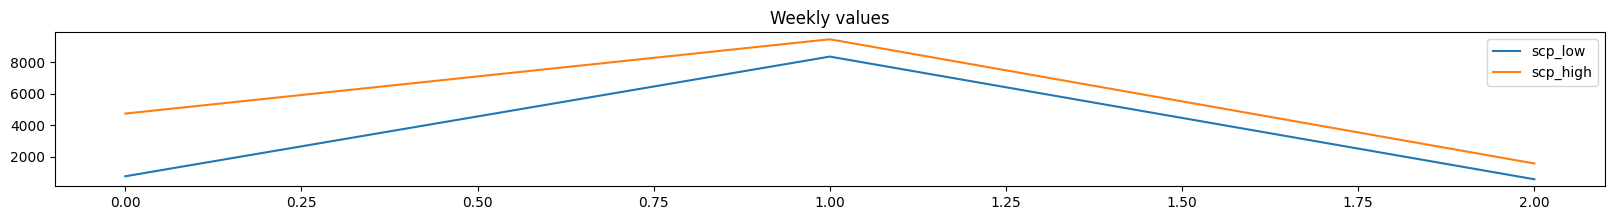

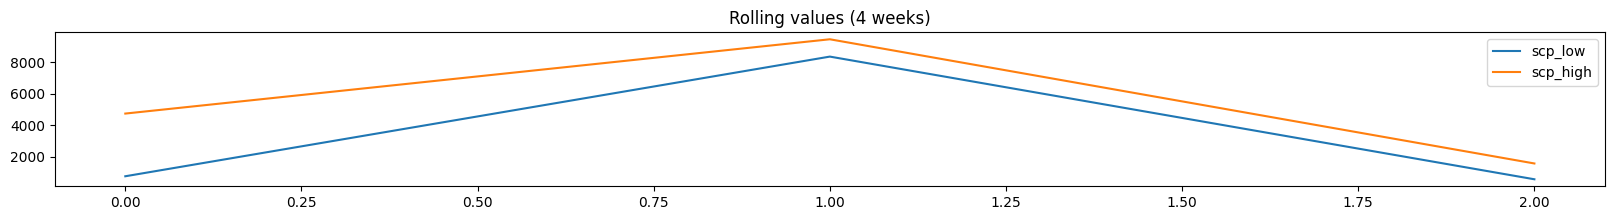

In [106]:
conn = duck_s3_connection()
        
df = conn.execute(f"SELECT * FROM read_parquet('s3://{bucket_name}/{live_prefix}/**/*.parquet', hive_partitioning = true)").df()

#display(df)
#display(df.readingFrom)
#display(df.energy.apply(lambda x: x.get('consumption').get('wattHours')))


df.readingFrom = pd.to_datetime(df.readingFrom, dayfirst=False)
df.set_index("readingFrom",inplace=True)

# add calendar week
df.week = df.index.isocalendar().week
weeklist = df.week.unique()
display(weeklist)

# calculate the breakpoints
weeklybreakpoints = []
for week in weeklist:
    myvalues = df[df.week == week].energy.apply(lambda x: float(x.get('consumption').get('wattHours'))).values
    print(f"len of myvalues: {len(myvalues)}")
    if len(myvalues) > 400:
        breakpoints = calculate_scp_stats(myvalues)
        weeklybreakpoints.append([week]+breakpoints)

# calculate the rolling values (12 weeks)
df_bp = pd.DataFrame(weeklybreakpoints,columns=["week","scp_low","scp_high"])
#df_bp_rolling_12 = df_bp[["scp_low","scp_high"]].rolling(12,min_periods=1).mean()
#df_bp_rolling_8 = df_bp[["scp_low","scp_high"]].rolling(8,min_periods=1).mean()
#df_bp_rolling_6 = df_bp[["scp_low","scp_high"]].rolling(6,min_periods=1).mean()
df_bp_rolling_4 = df_bp[["scp_low","scp_high"]].rolling(1,min_periods=1).mean()
ax = df_bp[["scp_low","scp_high"]].plot(figsize=(20,2),title="Weekly values")
#df_bp_rolling_12.plot(figsize=(20,2),title="Rolling values (12 weeks)");
#df_bp_rolling_8.plot(figsize=(20,2),title="Rolling values (8 weeks)");
#df_bp_rolling_6.plot(figsize=(20,2),title="Rolling values (6 weeks)");
df_bp_rolling_4.plot(figsize=(20,2),title="Rolling values (4 weeks)")


In [14]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

with conn.cursor() as cur:
    cur.execute("""SELECT * FROM page_visits_stats_1min ORDER BY page_id, report_ts;""")
    data = cur.fetchall() 
    visits_df = pd.DataFrame(data, 
                 columns=['report_ts', 'page_id', 'unique_visitors', 'total_visits', 'last_visit_time'])

visits_df.tail()
# conn.close()

In [15]:
import psycopg2
import pandas as pd
import plotly.express as px
from datetime import datetime
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import time

conn = psycopg2.connect(host="localhost", port=4566, user="root", dbname="dev") # Connect to RisingWave.
conn.autocommit = True # Set queries to be automatically committed.

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='real-time-plot'),
    dcc.Interval(
        id='interval-component',
        interval=1*1000,  # refresh interval in miliseconds 
        n_intervals=0
    )
])

@app.callback(
        Output('real-time-plot', 'figure'),
        [Input('interval-component', 'n_intervals')]
)

def update_graph(n_intervals):
    with conn.cursor() as cur:
        cur.execute("""SELECT * FROM page_visits_stats_1min ORDER BY page_id, report_ts;""")
        data = cur.fetchall()
        new_visits_df = pd.DataFrame(data, 
                          columns=['report_ts', 'page_id', 'unique_visitors', 'total_visits', 'last_visit_time'])
    avg_total_visits = new_visits_df.groupby('report_ts')['total_visits'].mean().reset_index()
    avg_total_visits['report_ts'] = pd.to_datetime(avg_total_visits['report_ts'])
    avg_total_visits = avg_total_visits[~(avg_total_visits['report_ts'] <= time.strftime("%Y"+"-"+"%m"+"-"+"%d"))]
    fig = px.line(avg_total_visits, x="report_ts", y="total_visits", title='Live Stream Performance: Average Total Website Visits',
                  labels = {"report_ts": "Report Timestamp", "total_visits": "Average Total Visits"})
    
    return fig

In [16]:
if __name__ == '__main__':
    app.run_server(debug=True)

In [145]:
from faker import Faker
from datetime import datetime, timedelta, timezone

fake = Faker()
str_format = "%Y-%m-%dT%H:%M:%SZ"
it = fake.time_series(start_date='-3d',
                 end_date='now',
                 precision=5.0,
                 tzinfo=timezone.utc)

#print(next(it)[0].strftime(str_format))
#print(next(it))
#print(next(it))

#print(sum(1 for _ in it))

for dt in it:
    print(f"datetime: {dt[0].strftime(str_format)}")


datetime: 2024-08-18T16:10:44Z
datetime: 2024-08-18T16:10:49Z
datetime: 2024-08-18T16:10:54Z
datetime: 2024-08-18T16:10:59Z
datetime: 2024-08-18T16:11:04Z
datetime: 2024-08-18T16:11:09Z
datetime: 2024-08-18T16:11:14Z
datetime: 2024-08-18T16:11:19Z
datetime: 2024-08-18T16:11:24Z
datetime: 2024-08-18T16:11:29Z
datetime: 2024-08-18T16:11:34Z
datetime: 2024-08-18T16:11:39Z
datetime: 2024-08-18T16:11:44Z
datetime: 2024-08-18T16:11:49Z
datetime: 2024-08-18T16:11:54Z
datetime: 2024-08-18T16:11:59Z
datetime: 2024-08-18T16:12:04Z
datetime: 2024-08-18T16:12:09Z
datetime: 2024-08-18T16:12:14Z
datetime: 2024-08-18T16:12:19Z
datetime: 2024-08-18T16:12:24Z
datetime: 2024-08-18T16:12:29Z
datetime: 2024-08-18T16:12:34Z
datetime: 2024-08-18T16:12:39Z
datetime: 2024-08-18T16:12:44Z
datetime: 2024-08-18T16:12:49Z
datetime: 2024-08-18T16:12:54Z
datetime: 2024-08-18T16:12:59Z
datetime: 2024-08-18T16:13:04Z
datetime: 2024-08-18T16:13:09Z
datetime: 2024-08-18T16:13:14Z
datetime: 2024-08-18T16:13:19Z
datetime